连接数据库!
Completion of data reading 


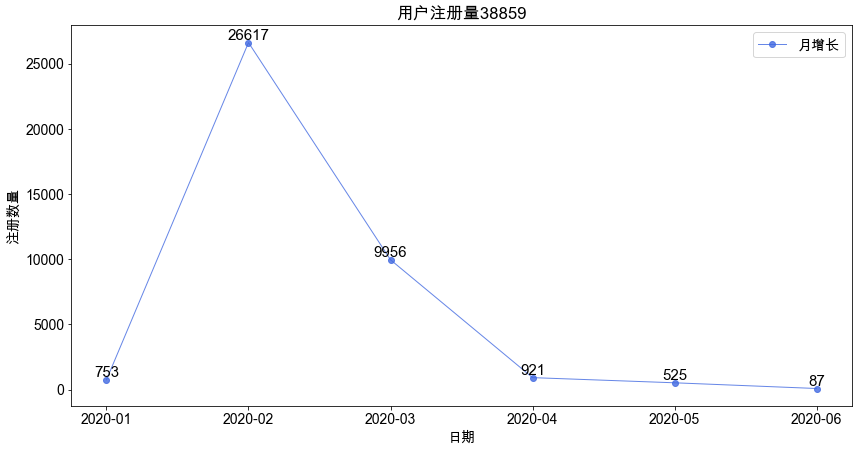

In [2]:
#!/usr/bin/python3
# %matplotlib inline  作用是将Matplotlib绘制的图形内嵌在Jupyter Notebook的页面中，无需执行命令plt.show()便可以直接在页面内展示绘制的图形。

%matplotlib inline 
import pymysql
import time
import matplotlib.pyplot as plt
 
def get_address(date_address,index):
    strlist = date_address.split('|')	# 用逗号分割str字符串，并保存到列表
    address = strlist[index];
    return address
    
def get_timestamp(date_time):
    ts = date_time / 1000
    #转换成localtime
    time_local = time.localtime(ts)
    date = time.strftime("%Y-%m", time_local)
    return date

def get_content_from_db(sql):
    print('连接数据库!')
    dbhost='127.0.0.1'
    dbuser='root'
    dbpass='123456'
    dbname='ip_info'
     # 创建数据库连接
    db = pymysql.connect(host=dbhost,user=dbuser,password=dbpass,database=dbname,charset = "utf8mb4")
    try:
       # 使用cursor()方法获取操作游标 
        cursor = db.cursor()
        # 执行SQL语句
        cursor.execute(sql)
         # 获取所有记录列表
        results = cursor.fetchall()
    except:
        print ('Reading Error ')    
    finally:
        db.close()
    print ('Completion of data reading ')    
    return (results)

def line_show(results,save_file_name):
    indexList = []
    timeList = []
    total = 0
    for i in results:
        total += i[1]
        indexList.append(i[1])
        timeList.append(i[0])

    plt.rcParams["font.family"] = 'Arial Unicode MS' # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
    plt.rc('figure', figsize = (14, 7))
    plt.rc('font', size = 14)
    plt.rc('axes', grid = False)
    plt.rc('axes', facecolor = 'white')
    plt.plot(timeList,
             indexList,
             'ro-',
             color='#4169E1',
             alpha=0.8,
             linewidth=1,
             label='月增长')
    # 设置数字标签
    for a, b in zip(timeList, indexList):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=15)
    plt.legend(loc="upper right")
    plt.title('用户注册量'+str(total))
    plt.xlabel('日期')
    plt.ylabel('注册数量')
    plt.savefig(save_file_name+'.png',facecolor='white',dpi= 200)
    plt.show()

# 查询当前数据库中的所有数据表
line_sql_1 = "SELECT FROM_UNIXTIME(create_time / 1000, '%Y-%m') AS date , COUNT(*) AS count FROM ip_registered GROUP BY date"
results = get_content_from_db(line_sql_1)
line_show(results,'line')




